**Income Prediction For Women in Urban Areas**

In [6]:
#source = https://www.kaggle.com/datasets/stealthtechnologies/regression-dataset-for-household-income-analysis

In [7]:
!pip install category-encoders

In [8]:
#importation of libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, HuberRegressor, Ridge, Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler


PREPARE DATA

In [9]:
def wrangle(filepath):
  #read csv file
  df = pd.read_csv(filepath)

  #subset to locations in urban areas
  mask_urban = df["Location"] == "Urban"

  #subset to female genders
  mask_gender = df["Gender"] == "Female"

  #subset to hometype
  mask_home = df["Type_of_Housing"] == "Townhouse"

  #subset to status of homeownership of own
  mask_own = df["Homeownership_Status"] == "Own"

  df=df[mask_urban & mask_gender & mask_home & mask_own]

  return df


In [10]:
df = wrangle("/content/data.csv")

print("df shape:", df.shape)
df.head()

#there are 397 females who own a townhouse and live in the urban area

df shape: (397, 14)


,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
75,21,High School,Education,0,Urban,2,Single,Part-time,5,Own,Townhouse,Female,Public transit,180722
88,31,Master's,Technology,4,Urban,18,Divorced,Part-time,5,Own,Townhouse,Female,Car,66424
89,40,High School,Finance,5,Urban,19,Single,Full-time,2,Own,Townhouse,Female,Biking,72678
120,50,Bachelor's,Healthcare,5,Urban,37,Single,Part-time,1,Own,Townhouse,Female,Public transit,72046
154,26,High School,Others,0,Urban,5,Single,Self-employed,2,Own,Townhouse,Female,Car,70662


In [11]:
df.describe()["Number_of_Dependents"] #change the datatype of number of dependents

count    397.000000
mean       2.428212
std        1.618395
min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
max        5.000000
Name: Number_of_Dependents, dtype: float64

In [12]:
df.describe()["Work_Experience"]

count    397.000000
mean      24.745592
std       14.902656
min        0.000000
25%       11.000000
50%       24.000000
75%       38.000000
max       50.000000
Name: Work_Experience, dtype: float64

In [13]:
df.describe()["Income"]

count    3.970000e+02
mean     5.474805e+05
std      1.601118e+06
min      3.170700e+04
25%      6.786600e+04
50%      7.164000e+04
75%      7.511800e+04
max      9.627488e+06
Name: Income, dtype: float64

Text(0.5, 1.0, 'Buenos Aires: Income vs Work Experience')

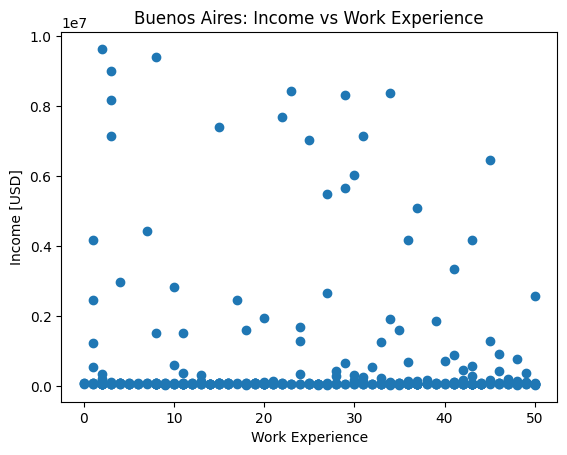

In [14]:

plt.scatter(x=df["Work_Experience"], y=df["Income"])
plt.xlabel("Work Experience")
plt.ylabel("Income [USD]")
plt.title('Buenos Aires: Income vs Work Experience')


Text(0.5, 1.0, 'years of work experience')

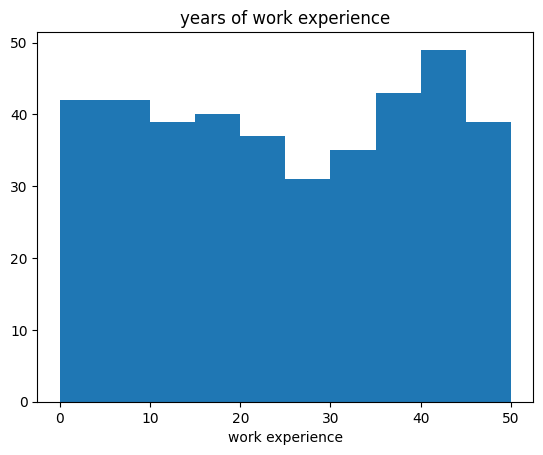

In [15]:
plt.hist(df["Work_Experience"])
plt.xlabel("work experience")
plt.title("years of work experience")

FEATURES AND TARGET

In [16]:
#creating a feature matrix
features = ["Work_Experience"]
X = df[features]
X.shape

(397, 1)

In [17]:
#creating a target vector
target = "Income"
y = df[target]
y.shape

(397,)

CREATING A BASELINE

In [18]:
y_mean = y.mean()
y_mean

547480.5314861462

In [19]:
y_pred_baseline = [y_mean]* len(y) #creatibg a list with values y mean repeated

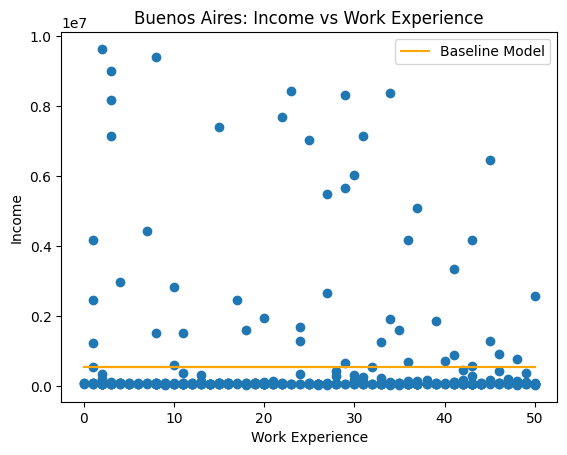

In [20]:
plt.plot(df['Work_Experience'], y_pred_baseline, color='orange', label ="Baseline Model")

plt.scatter(X, y)
plt.xlabel("Work Experience")
plt.ylabel("Income")
plt.title("Buenos Aires: Income vs Work Experience")
plt.legend();

In [49]:
mae_baseline = mean_absolute_error(y, y_pred_baseline)

print("Mean Income: ", round(y_mean, 2))
print("Baseline MAE: ", round(mae_baseline, 2))

Mean Income:  547480.53
Baseline MAE:  810373.13


BUILD MODEL

SPLIT

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

MODEL SELECTION

POLYNOMIAL

In [23]:
#instantiating the model
poly = PolynomialFeatures(degree=2)

#training on the X train
X_poly_train = poly.fit_transform(X_train)

#testing on the X test
X_poly_test = poly.transform(X_test)

#instantiating the Linear Regression Model
poly_model = LinearRegression()

#training on the linear regression model
poly_model.fit(X_poly_train, y_train)

#trying to get predictions
y_poly_pred_test = poly_model.predict(X_poly_test)
poly_mae_test = mean_absolute_error(y_test, y_poly_pred_test)

In [24]:
print(f'Polynomial MAE: {poly_mae_test}')

Polynomial MAE: 682265.2031416835


RANDOM FOREST

In [25]:
#instantiating the random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

#training with the random forest model
rf_model.fit(X_train, y_train)

#creating predictions using the X test set
y_rf_pred_test = rf_model.predict(X_test)

#getting the mean absolute error of the y test set and and the y predictions
rf_mae_test = mean_absolute_error(y_test, y_rf_pred_test)


In [26]:
print(f'Random Forest MAE: {rf_mae_test}')

Random Forest MAE: 748880.0606813361


HUBER REGRESSOR

In [27]:
# Huber Regression (Robust Regression)
#instantiating the model
huber_model = HuberRegressor()

#training the model
huber_model.fit(X_train, y_train)

#creating the predictions
y_huber_pred_test = huber_model.predict(X_test)

#calculating the mae of the y test and the y predictions
huber_mae_test = mean_absolute_error(y_test, y_huber_pred_test)


In [28]:
print(f'Huber Regression MAE: {huber_mae_test}')

Huber Regression MAE: 313004.7820202943


PLOTTING THE MODELS

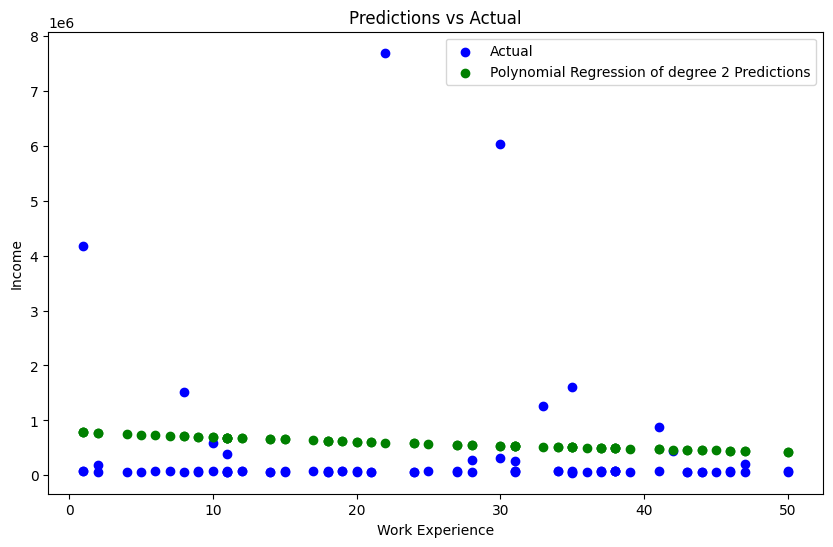

In [29]:
# Plot predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_poly_pred_test, color='green', label='Polynomial Regression of degree 2 Predictions')
plt.xlabel('Work Experience')
plt.ylabel('Income')
plt.title('Predictions vs Actual')
plt.legend()
plt.show()

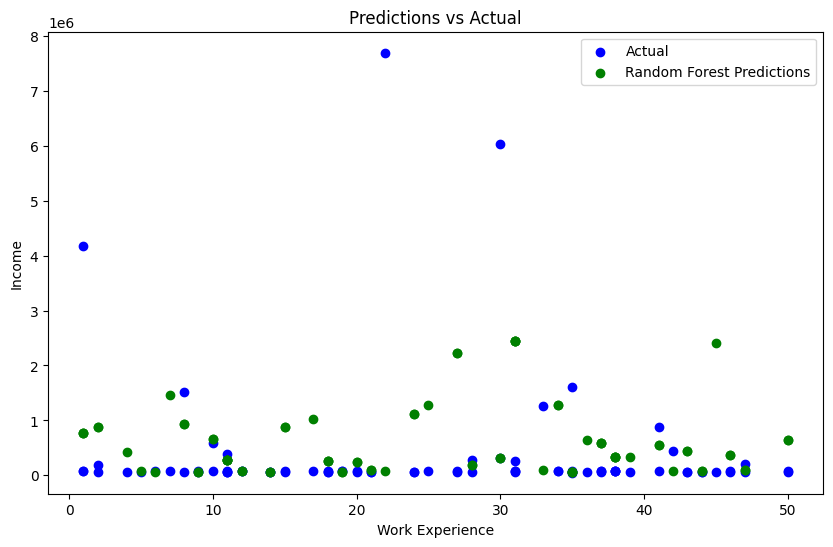

In [30]:
# Plot predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_rf_pred_test, color='green', label='Random Forest Predictions')
plt.xlabel('Work Experience')
plt.ylabel('Income')
plt.title('Predictions vs Actual')
plt.legend()
plt.show()

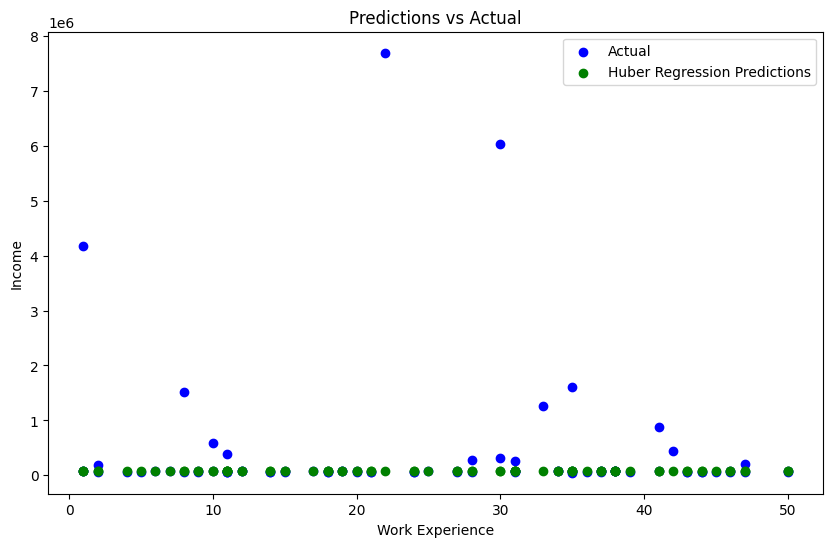

In [31]:
# Plot predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_huber_pred_test, color='green', label='Huber Regression Predictions')
plt.xlabel('Work Experience')
plt.ylabel('Income')
plt.title('Predictions vs Actual')
plt.legend()
plt.show()

INVESTIGATING WHY HUBER REGRESSION DID THE BEST

In [32]:
# Random Forest with Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

#instatiating the model
rf_model = RandomForestRegressor(random_state=42)
#using grid search
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

#fitting the grid search
grid_search.fit(X_train, y_train)

#getting the best model
best_rf_model = grid_search.best_estimator_

#getting predictions
y_rf_pred_test = best_rf_model.predict(X_test)

#calculating mae
rf_mae_test = mean_absolute_error(y_test, y_rf_pred_test)


In [33]:
print(f'Random Forest MAE: {rf_mae_test}')

Random Forest MAE: 745611.2412287665


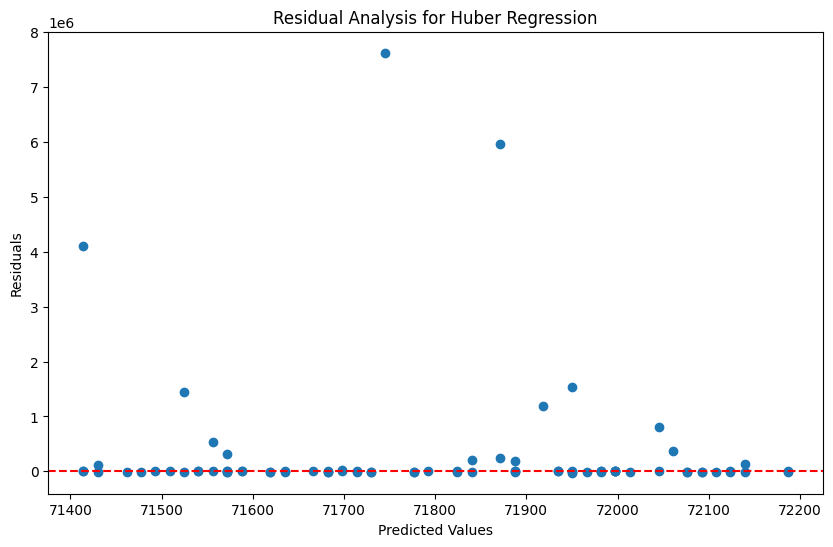

In [34]:
# Residual Analysis for Huber Regression
residuals = y_test - y_huber_pred_test

plt.figure(figsize=(10, 6))
plt.scatter(y_huber_pred_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis for Huber Regression')
plt.show()

In [35]:
# Calculate residuals
residuals = y_test - y_huber_pred_test

# Identify outliers based on residuals
outlier_threshold = 2 * np.std(residuals)
outliers = residuals[np.abs(residuals) > outlier_threshold]

# Print outlier information
print("Number of outliers detected:", len(outliers))
print("Outliers:")
print(outliers)

# Examine outlier cases in the dataset
outlier_indices = np.where(np.abs(residuals) > outlier_threshold)
print("Outlier data points:")
print(X_test.iloc[outlier_indices])
print(y_test.iloc[outlier_indices])


Number of outliers detected: 3
Outliers:
1865    4.109527e+06
7033    5.961041e+06
9869    7.623817e+06
Name: Income, dtype: float64
Outlier data points:
      Work_Experience
1865                1
7033               30
9869               22
1865    4180941
7033    6032912
9869    7695562
Name: Income, dtype: int64


MORE INVESTIGATION

In [36]:
# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
# Huber Regression (Robust Regression)
huber_model = HuberRegressor()
huber_model.fit(X_train, y_train)
y_huber_pred_train = huber_model.predict(X_train)
y_huber_pred_test = huber_model.predict(X_test)

In [38]:
# Calculate residuals for the entire training set
residuals_train = y_train - y_huber_pred_train

In [39]:
# Detect outliers in the entire training set
outlier_threshold_train = 2 * np.std(residuals_train)
outliers_train = np.abs(residuals_train) > outlier_threshold_train

In [40]:
# Get indices of outliers in the training set
outlier_indices_train = X_train.index[outliers_train]


In [41]:
print("Number of outliers detected in training set:", len(outlier_indices_train))
print("Outlier indices in training set:", outlier_indices_train)

Number of outliers detected in training set: 18
Outlier indices in training set: Index([1506, 6364, 8115, 3626, 1438, 3735, 1701, 3357, 4025,  881, 2519, 5197,
       6324, 1278, 6597, 6774, 6327, 2736],
      dtype='int64')


In [42]:
# Remove outliers from the training set
X_train_no_outliers = X_train.drop(index=outlier_indices_train)
y_train_no_outliers = y_train.drop(index=outlier_indices_train)

In [43]:
# Re-train Huber Regression without Outliers
huber_model_no_outliers = HuberRegressor()
huber_model_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)
y_huber_no_outliers_pred_test = huber_model_no_outliers.predict(X_test)
huber_no_outliers_mae_test = mean_absolute_error(y_test, y_huber_no_outliers_pred_test)
print(f'Huber Regression without Outliers MAE: {huber_no_outliers_mae_test}')

Huber Regression without Outliers MAE: 312998.8488893128


In [44]:
# Re-train Random Forest without Outliers
from sklearn.ensemble import RandomForestRegressor
rf_model_no_outliers = RandomForestRegressor(random_state=42)
rf_model_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)
y_rf_no_outliers_pred_test = rf_model_no_outliers.predict(X_test)
rf_no_outliers_mae_test = mean_absolute_error(y_test, y_rf_no_outliers_pred_test)
print(f'Random Forest without Outliers MAE: {rf_no_outliers_mae_test}')

Random Forest without Outliers MAE: 443849.07542590844


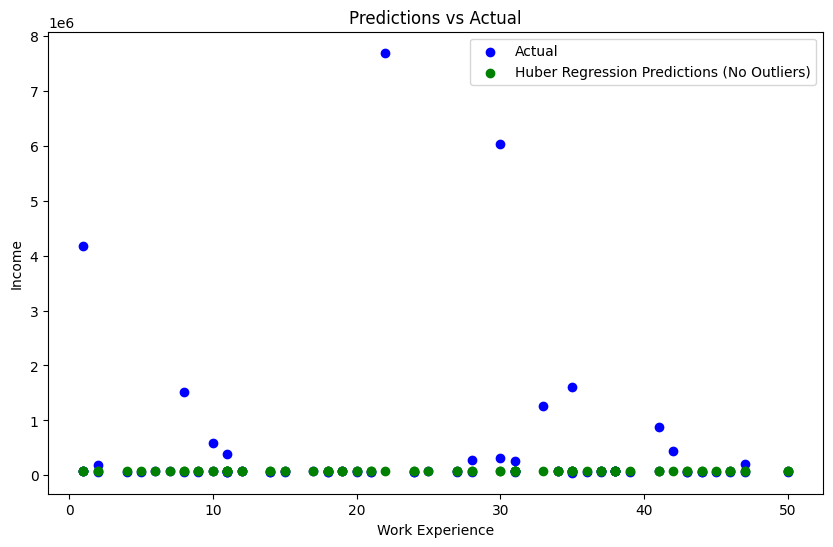

In [45]:
# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_huber_no_outliers_pred_test, color='green', label='Huber Regression Predictions (No Outliers)')
plt.xlabel('Work Experience')
plt.ylabel('Income')
plt.title('Predictions vs Actual')
plt.legend()
plt.show()

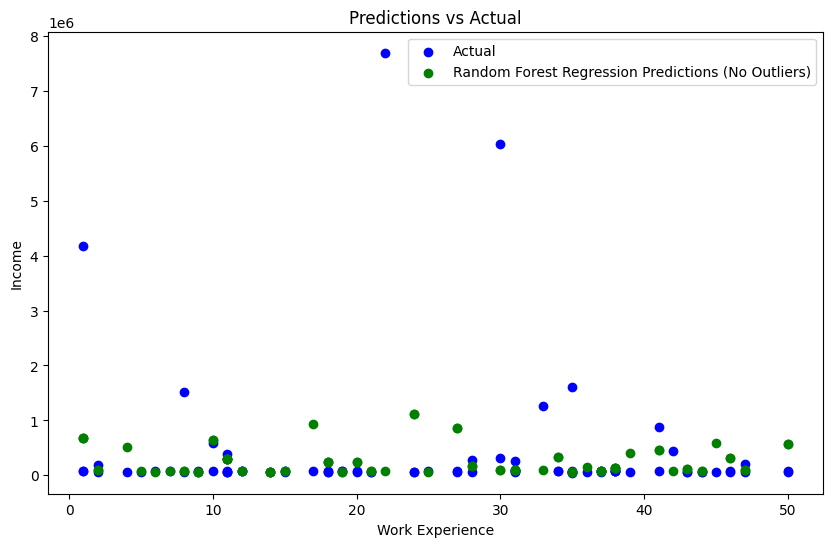

In [46]:
# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_rf_no_outliers_pred_test, color='green', label='Random Forest Regression Predictions (No Outliers)')
plt.xlabel('Work Experience')
plt.ylabel('Income')
plt.title('Predictions vs Actual')
plt.legend()
plt.show()